**Importing necessary libraries**

In [17]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


**Loading the dataset:**

In [9]:
df = pd.read_csv("/content/drive/MyDrive/TextMining_Project/lemmatized_data.csv")
df = df.dropna(subset=["lemmatized_text"])
documents = df["lemmatized_text"].astype(str)
df

,lemmatized_text,bert_label
0,"what to know about marty makary , trump ’ s pi...",strongly pro-regulation
1,how to spot adhd misinformation on tiktok,anti-regulation
2,openai face privacy complaint in norway over c...,anti-regulation
3,the challenge of managing ai risk : innovation...,strongly pro-regulation
4,amy klobuchar 's health misinformation act ha ...,anti-regulation
...,...,...
1049,american agree : online oversharing is out of ...,anti-regulation
1050,meta ha updated it brand safety tool which wil...,strongly pro-regulation
1051,new poll reveals a majority of american want m...,anti-regulation
1052,reddit ’ s new update allows user to control s...,strongly pro-regulation


In [12]:
# Create Document-Term Matrix with CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['lemmatized_text'])
vocab = vectorizer.get_feature_names_out()
vocab_array = np.asarray(vocab)

In [13]:
# Fit LDA model
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics,
                                      max_iter=100,
                                      learning_method='online',
                                      random_state=42)
doc_topic_matrix = lda_model.fit_transform(X)

**Topics:**

In [14]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic #{idx}")
        print([(vectorizer.get_feature_names_out()[i], topic[i])
               for i in topic.argsort()[:-top_n - 1:-1]])

print_topics(lda_model, vectorizer, 15)


Topic #0
[('trump', np.float64(45.138307211786795)), ('online', np.float64(13.556994442540331)), ('year', np.float64(12.839353460966077)), ('new', np.float64(11.307939706348302)), ('post', np.float64(11.213343567608762)), ('covid', np.float64(11.081581943650564)), ('security', np.float64(11.024401815731276)), ('war', np.float64(9.421698963267737)), ('based', np.float64(9.176339929483728)), ('york', np.float64(8.47331567955409)), ('election', np.float64(8.461639282813945)), ('rise', np.float64(8.282913434929196)), ('say', np.float64(8.078563452827007)), ('management', np.float64(7.692367775944964)), ('machine', np.float64(6.955722436985489))]

Topic #1
[('digital', np.float64(177.10822860669347)), ('content', np.float64(111.30794335997153)), ('control', np.float64(93.43637769498677)), ('information', np.float64(91.64670879650089)), ('medium', np.float64(87.93329198312452)), ('news', np.float64(87.2563163675389)), ('moderation', np.float64(82.59651319142128)), ('social', np.float64(71.0

**Topic Word Distribution Visualization**

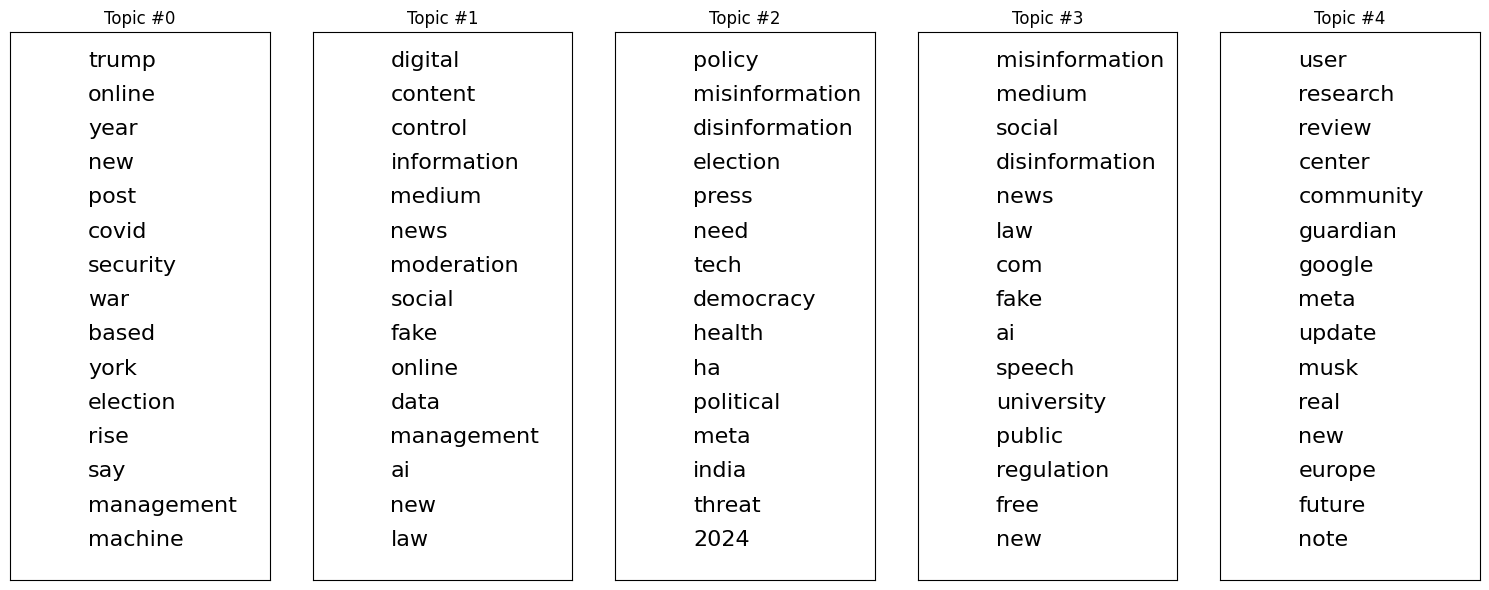

In [16]:
word_topic = np.array(lda_model.components_).T
num_top_words = 15
fontsize_base = 16

plt.figure(figsize=(num_topics * 3, 6))
for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)
    plt.ylim(0, num_top_words + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Topic #{t}")
    top_word_idx = word_topic[:, t].argsort()[::-1][:num_top_words]
    top_words = vocab_array[top_word_idx]
    for i, word in enumerate(top_words):
        plt.text(0.3, num_top_words - i, word, fontsize=fontsize_base)
plt.tight_layout()
plt.show()

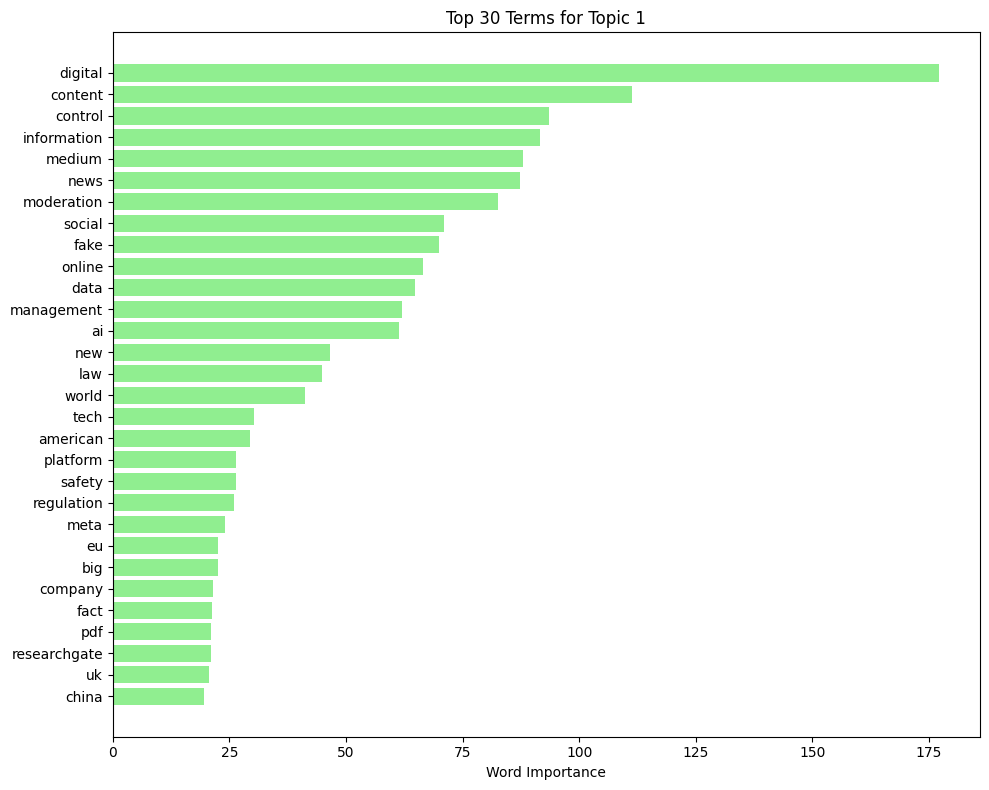

In [23]:
def plot_top_terms(model, feature_names, topic_index=1, n_words=30):
    topic = model.components_[topic_index]
    top_idx = topic.argsort()[::-1][:n_words]
    top_terms = feature_names[top_idx]
    top_weights = topic[top_idx]

    plt.figure(figsize=(10, 8))
    plt.barh(top_terms[::-1], top_weights[::-1], color='lightgreen')
    plt.xlabel("Word Importance")
    plt.title(f"Top {n_words} Terms for Topic {topic_index}")
    plt.tight_layout()
    plt.show()

plot_top_terms(lda_model, vocab_array, topic_index=1, n_words=30)

**Inter-Topic Distance Map using PCA**

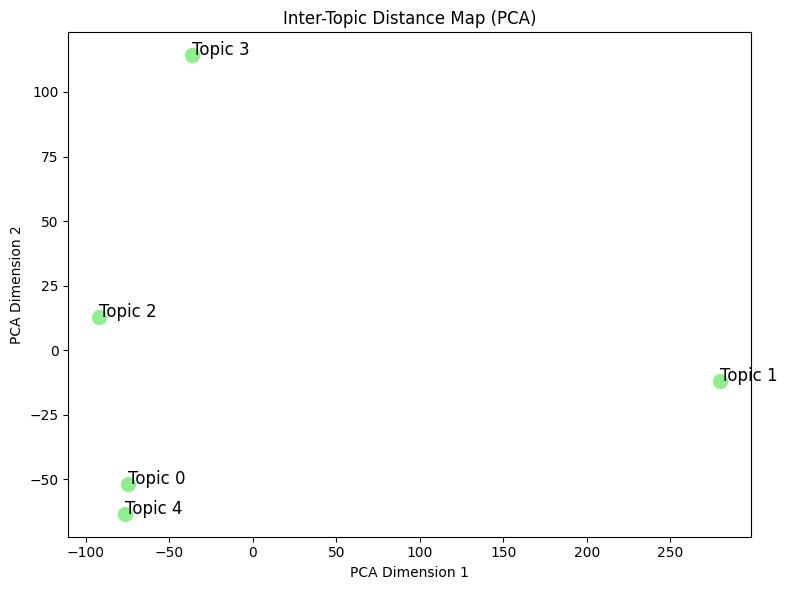

In [24]:
def plot_inter_topic_distance_map(model):
    topic_vectors = model.components_
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(topic_vectors)

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], color='lightgreen', s=100)

    for i, (x, y) in enumerate(reduced):
        plt.text(x + 0.01, y + 0.01, f"Topic {i}", fontsize=12)

    plt.title("Inter-Topic Distance Map (PCA)")
    plt.xlabel("PCA Dimension 1")
    plt.ylabel("PCA Dimension 2")
    plt.tight_layout()
    plt.show()

# Generate both plots
plot_inter_topic_distance_map(lda_model)